Copyright (c) 2017 Shuang Wu

# Package Import

Include package for data read and CNN

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from PIL import Image
import struct

# Raw image transfer to Data

### Train image data

The data will be store in n dim list named train_img. The length of the train_img is 60000, list, and for each row the size is 1\*784. The 784 is 28\*28 which is the orginal pixel for the input image. Index from 0 to 59999.

In [5]:
f = open('train-images.idx3-ubyte', 'rb')
index = 0
buf = f.read()
f.close()
magic, images, rows, columns = struct.unpack_from('>IIII' , buf , index)
index += struct.calcsize('>IIII')
train_img = []
for i in range(images):
    image = Image.new('L', (columns, rows))
    for x in range(rows):
        for y in range(columns):
            image.putpixel((y, x), int(struct.unpack_from('>B', buf, index)[0]))
            index += struct.calcsize('>B')
    train_img.append(np.array(image).reshape(1,784)[0])

### Train image Label

The labels will be store in the train_labelArr with the length 60000, list. Each row indicate the label for the corresponding image. Index from 0 to 59999.

In [6]:
f = open('train-labels.idx1-ubyte', 'rb')
index = 0
buf = f.read()
f.close()
magic, labels = struct.unpack_from('>II' , buf , index)
index += struct.calcsize('>II')
train_labelArr = [0] * labels
for x in range(labels):
    train_labelArr[x] = int(struct.unpack_from('>B', buf, index)[0])
    index += struct.calcsize('>B')

##### Reshape and show example image

Can use the reshape(28,28) to rebuilt the image and show it using following code

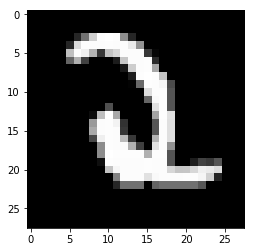

2


In [7]:
n = 400
show_exp1 = train_img[n]
show_exp1 = show_exp1.reshape(28,28)
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(show_exp1, cmap='gray')
plt.show()
print(train_labelArr[n])

### Test image Data

The data will be store in n dim list named test_img. The length of the test_img is 10000 and for each row the size is 1\*784. The 784 is 28\*28 which is the orginal pixel for the input image. Index from 0 to 9999. Show example same as before.

In [8]:
f = open('t10k-images.idx3-ubyte', 'rb')
index = 0
buf = f.read()
f.close()
magic, images, rows, columns = struct.unpack_from('>IIII' , buf , index)
index += struct.calcsize('>IIII')
test_img = []
for i in range(images):
    image = Image.new('L', (columns, rows))
    for x in range(rows):
        for y in range(columns):
            image.putpixel((y, x), int(struct.unpack_from('>B', buf, index)[0]))
            index += struct.calcsize('>B')
    test_img.append(np.array(image).reshape(1,784)[0])

### Test image Label

The labels will be store in the test_labelArr with the length 10000, list. Each row indicate the label for the corresponding image. Index from 0 to 9999.

In [9]:
f = open('t10k-labels.idx1-ubyte', 'rb')
index = 0
buf = f.read()
f.close()
magic, labels = struct.unpack_from('>II' , buf , index)
index += struct.calcsize('>II')
test_labelArr = [0] * labels
for x in range(labels):
    test_labelArr[x] = int(struct.unpack_from('>B', buf, index)[0])
    index += struct.calcsize('>B')

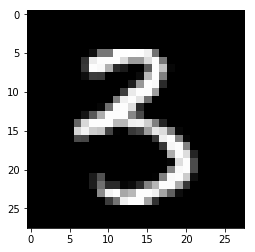

3


In [10]:
n2 = 5000
show_exp2 = test_img[n2]
show_exp2 = show_exp2.reshape(28,28)
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(show_exp2, cmap='gray')
plt.show()
print(test_labelArr[n2])

# Model training

### package import

In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [14]:
# seed for repeat
seed = 7
np.random.seed(seed)
# reshape to be [samples][channels][width][height]
X_train = np.array(train_img).reshape(len(train_img), 1, 28, 28).astype('float32')
X_test = np.array(test_img).reshape(len(test_img), 1, 28, 28).astype('float32')


In [15]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# one hot encode outputs
y_train = np_utils.to_categorical(train_labelArr)
y_test = np_utils.to_categorical(test_labelArr)
num_classes = y_test.shape[1]

In [17]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5),  padding='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
161s - loss: 0.2454 - acc: 0.9302 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 2/10
157s - loss: 0.0750 - acc: 0.9781 - val_loss: 0.0478 - val_acc: 0.9844
Epoch 3/10
154s - loss: 0.0540 - acc: 0.9839 - val_loss: 0.0471 - val_acc: 0.9841
Epoch 4/10
154s - loss: 0.0420 - acc: 0.9866 - val_loss: 0.0390 - val_acc: 0.9870
Epoch 5/10
152s - loss: 0.0347 - acc: 0.9894 - val_loss: 0.0358 - val_acc: 0.9875
Epoch 6/10
152s - loss: 0.0263 - acc: 0.9919 - val_loss: 0.0353 - val_acc: 0.9887
Epoch 7/10
152s - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0335 - val_acc: 0.9900
Epoch 8/10
175s - loss: 0.0199 - acc: 0.9936 - val_loss: 0.0306 - val_acc: 0.9902
Epoch 9/10
160s - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 10/10
156s - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0295 - val_acc: 0.9910


In [19]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.90%


### Model Save

In [20]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

### Model Loads

In [3]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('E:/python_code/CNN/my_model.h5')

### Analysis

In [50]:
print(model.layers[5])

In [24]:
model.get_weights()[1]

array([-0.13487577, -0.06684692,  0.02204445, -0.03728344,  0.00356143,
       -0.08376622,  0.00724729, -0.06807438, -0.06307595, -0.15682453,
       -0.06084101, -0.00083955, -0.0332096 , -0.01690843, -0.00278416,
       -0.00611288, -0.09106699, -0.11052281, -0.03993054, -0.06385043,
       -0.11741884, -0.0092161 , -0.00093471, -0.062318  , -0.11378164,
       -0.00839758, -0.01548895, -0.00541625, -0.09526169, -0.05757957], dtype=float32)

In [11]:
30*12*12

4320

In [29]:
model.get_weights()[2]

array([[ 0.00745522, -0.01378735, -0.01580904, ..., -0.00639687,
         0.00655776, -0.00265368],
       [ 0.04869512, -0.02433876, -0.04098672, ...,  0.0095571 ,
         0.0099704 ,  0.01914881],
       [ 0.00908333, -0.03028227, -0.03863726, ..., -0.02767626,
         0.06637164,  0.00411596],
       ..., 
       [-0.00894228,  0.06156997,  0.02430212, ...,  0.02888414,
        -0.0987619 ,  0.05617272],
       [-0.01297561,  0.12657604,  0.02110012, ..., -0.02628901,
        -0.05141185, -0.03782418],
       [ 0.00533535,  0.01731882,  0.01076317, ..., -0.00161557,
         0.04156122, -0.01793753]], dtype=float32)

In [51]:
model.get_weights()[0]

array([[[[ 0.04600683,  0.07043359,  0.11114135,  0.02260796, -0.07168032,
           0.01433991, -0.4471736 , -0.00825066, -0.16305234, -0.20873116,
          -0.040181  , -0.34648165,  0.07463448, -0.10657258, -0.09718111,
           0.11885654, -0.01017097,  0.01198343, -0.02121506,  0.12686998,
           0.01532159,  0.00624978,  0.04057984, -0.00888603,  0.0489433 ,
          -0.08820301, -0.02039105, -0.00243238,  0.01898998, -0.05893135]],

        [[ 0.05474606,  0.10464036,  0.14320637,  0.12737708, -0.16465375,
           0.01435858, -0.37367606, -0.01471729,  0.02135436, -0.14508966,
          -0.00577846, -0.22872616, -0.06177927,  0.02803487, -0.26919279,
          -0.17842093, -0.1621971 ,  0.01925706,  0.12298234, -0.10630535,
          -0.00232219,  0.09411357,  0.0321041 ,  0.06847101,  0.10388418,
          -0.10024849, -0.12355251,  0.10492017,  0.01723663, -0.13331063]],

        [[ 0.03410382, -0.09162059,  0.06412887,  0.14634211, -0.08262877,
           0.116205

In [53]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 1, 28, 28),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_first',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 30,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (5, 5),
   'name': 'conv2d_1',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_first',
   'name': 'max_pooling2d_1',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Dropout',
  'config': {'name': 'dropout_1', 'rate': 0.2,

### Visualization

In [68]:
from keras import backend as K

In [69]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

In [75]:
input_shape=(1, 28, 28)

In [174]:
outputs

[<tf.Tensor 'conv2d_1_1/Relu:0' shape=(?, 30, 24, 24) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1_1/transpose_1:0' shape=(?, 30, 12, 12) dtype=float32>,
 <tf.Tensor 'dropout_1_1/cond/Merge:0' shape=(?, 30, 12, 12) dtype=float32>,
 <tf.Tensor 'flatten_1_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'dense_1_1/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_2_1/Softmax:0' shape=(?, 10) dtype=float32>]

In [140]:
# Testing
n = 400
exp1 = train_img[n]
exp1 = show_exp1.reshape(1,1,28,28)/255
layer_outs = functor([exp1, 1.])
print(layer_outs)

[array([[[[  0.00000000e+00,   2.63511240e-02,   0.00000000e+00, ...,
            6.05586171e-03,   8.16580802e-02,   8.69500637e-02],
         [  5.15439361e-02,   9.57644135e-02,   0.00000000e+00, ...,
            1.10063344e-01,   8.93089622e-02,   0.00000000e+00],
         [  9.75390673e-02,   0.00000000e+00,   8.90122354e-03, ...,
            7.93808699e-03,   1.88798755e-02,   1.16827965e-01],
         ..., 
         [  7.10770339e-02,   0.00000000e+00,   4.85478044e-02, ...,
            0.00000000e+00,   9.21234339e-02,   2.37692595e-02],
         [  0.00000000e+00,   2.75219381e-02,   0.00000000e+00, ...,
            0.00000000e+00,   2.23363191e-02,   8.17365348e-02],
         [  1.38535053e-02,   9.07247961e-02,   1.58690959e-01, ...,
            1.08972788e-01,   0.00000000e+00,   1.17802083e-01]],

        [[  0.00000000e+00,   4.53218818e-04,   0.00000000e+00, ...,
            0.00000000e+00,   1.32073939e-01,   0.00000000e+00],
         [  0.00000000e+00,   1.54679269e-02

In [175]:
layer_outs[3].shape

(1, 4320)

In [176]:
30*12*12

4320

In [59]:
show_exp1

array([[-76.58812714, -12.59304619, -18.78030777,   6.14096785,
        -35.49513626],
       [ 16.21825409,  14.21976662,  18.86579895, -29.30376244,
          5.86493826],
       [ 43.41172791,  52.76351929,  25.47080994,   2.32188272,
         27.21266365],
       [-20.40563202,   4.79502583, -31.83640862, -56.00339127,
        -33.15532684],
       [-32.2154808 ,  -4.1812768 , -30.37717247,  49.64163208,
         13.14737892]], dtype=float32)

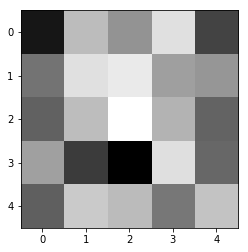

In [101]:
show_exp1 = model.get_weights()[0].reshape(30,1,5,5)[3][0] * 255
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(show_exp1, cmap='gray')
plt.show()


In [50]:
model.get_weights()[0].reshape(30,1,5,5)[0][0].shape

(5, 5)

In [77]:
model.get_weights()[5]

array([-0.00711221,  0.0509821 ,  0.02295083, -0.02891735,  0.00895527,
        0.01192364, -0.03893128,  0.00521013, -0.02529477,  0.00225516], dtype=float32)

In [90]:
test_arr = [1,9,1,9,2,8,2,8,3,7,3,7,4,6,4,6]

In [91]:
test_arr

[1, 9, 1, 9, 2, 8, 2, 8, 3, 7, 3, 7, 4, 6, 4, 6]

In [92]:
np.array(test_arr).reshape(4,1,2,2).shape

(4, 1, 2, 2)

In [93]:
np.array(test_arr).reshape(4,1,2,2)

array([[[[1, 9],
         [1, 9]]],


       [[[2, 8],
         [2, 8]]],


       [[[3, 7],
         [3, 7]]],


       [[[4, 6],
         [4, 6]]]])

In [94]:
np.array(test_arr).reshape(2,2,1,4)

array([[[[1, 9, 1, 9]],

        [[2, 8, 2, 8]]],


       [[[3, 7, 3, 7]],

        [[4, 6, 4, 6]]]])

In [95]:
np.array(test_arr).reshape(2,2,1,4).shape

(2, 2, 1, 4)